
#*IMAGE CLASSIFICATION CNN*

## Nama: Aldiva Wibowo
## Kelas: Data Science B

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
sns.set(style='whitegrid')

from random import shuffle  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
class_names=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/gdrive/MyDrive/dataset/Image/Flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/gdrive/MyDrive/dataset/Image/Flowers/sunflower'
FLOWER_TULIP_DIR='/content/gdrive/MyDrive/dataset/Image/Flowers/tulip'
FLOWER_DANDI_DIR='/content/gdrive/MyDrive/dataset/Image/Flowers/dandelion'
FLOWER_ROSE_DIR='/content/gdrive/MyDrive/dataset/Image/Flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [ ]:
import cv2                  
from tqdm import tqdm
import os               

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:12<00:00, 62.64it/s] 

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:12<00:00, 58.64it/s] 

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:17<00:00, 56.75it/s] 

2481


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:19<00:00, 55.25it/s] 

3533


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:12<00:00, 62.81it/s] 

4317


In [ ]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(len(labels))
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title('Image #{} : '.format(index) + labels[index])
    plt.show()

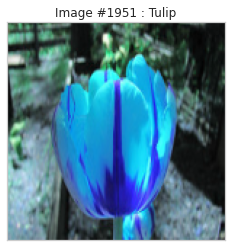

In [ ]:
display_random_image(class_names, X, Z)

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape

(3237, 150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 34s 854ms/step - loss: 1.4391 - accuracy: 0.3454 - val_loss: 1.1359 - val_accuracy: 0.5296
Epoch 2/50
25/25 [==============================] - 20s 777ms/step - loss: 1.1785 - accuracy: 0.5227 - val_loss: 1.0662 - val_accuracy: 0.5685
Epoch 3/50
25/25 [==============================] - 20s 795ms/step - loss: 1.0324 - accuracy: 0.5922 - val_loss: 0.9669 - val_accuracy: 0.6222
Epoch 4/50
25/25 [==============================] - 19s 764ms/step - loss: 0.9615 - accuracy: 0.6253 - val_loss: 0.8871 - val_accuracy: 0.6565
Epoch 5/50
25/25 [==============================] - 19s 764ms/step - loss: 0.9396 - accuracy: 0.6324 - val_loss: 0.9069 - val_accuracy: 0.6361
Epoch 6/50
25/25 [==============================] - 19s 762ms/step - loss: 0.9124 - accuracy: 0.6439 - val_loss: 0.8389 - val_accuracy: 0.6639
Epoch 7/50
25/25 [==============================] - 19s 760ms/step - loss: 0.8537 - accuracy: 0.6597 - val_loss: 0.8048 - val_accuracy: 0.6870

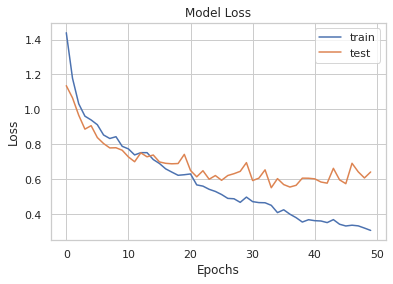

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

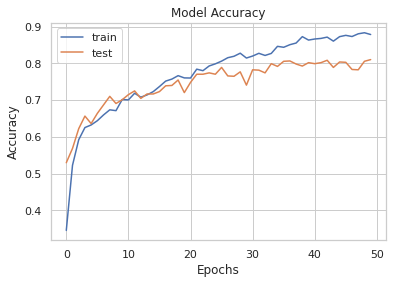

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

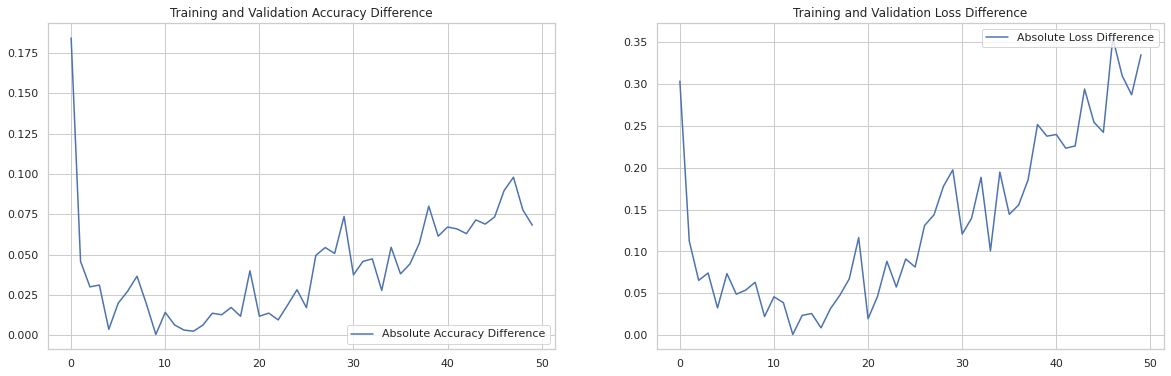

In [ ]:
epochs_range = range(epochs)

acc_difference = abs(np.array(History.history['accuracy']) - np.array(History.history['val_accuracy']))
loss_difference = abs(np.array(History.history['loss']) - np.array(History.history['val_loss']))

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_difference, label='Absolute Accuracy Difference')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Difference')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_difference, label='Absolute Loss Difference')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
test_digits = np.argmax(y_test,axis=1)

In [ ]:
print("Accuracy : {}".format(accuracy_score(test_digits, pred_digits)))

Accuracy : 0.8101851851851852


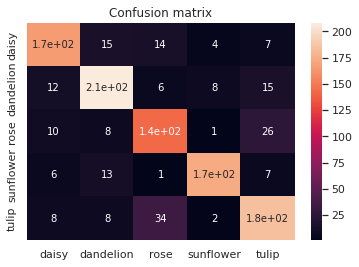

In [ ]:
CM = confusion_matrix(test_digits, pred_digits)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


In [ ]:
pred_labels = le.inverse_transform(pred_digits)

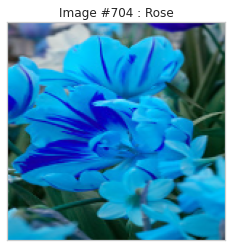

In [ ]:
display_random_image(class_names, x_test, pred_labels)
